<a href="https://colab.research.google.com/github/Jyoti-S-Shukla/Deep-learning-models/blob/main/Neural%20network%20with%20backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Layered Neural Netwrok and Backpropogation  



Referrence Material : 
      
  1. **Chapter 4:, page no. 106-136, Artificial Neural Network by B. Yegnanarayana)**

  2. https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

  3. https://www.geeksforgeeks.org/deep-neural-net-with-forward-and-back-propagation-from-scratch-python/

  4. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

  5. https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484

#**Problem 1** : Demonstrate the working principle of multi layer neural network, with non-linearly separable and non-convex data.

Observation to be demonstrated:
1. Two layer neural network (i.e one output layer) not able to classify non-linearly
separable data. Solve the problem by increasing the no. of layer and changing the
activation function from hard-limiting to sigmoid.
2. Similar observations have to be demonstrated for non-convex data.(i.e 3 layer network not able to learn the appropriate separating hyper plane, which being resolved
using 4 layer network.)
3. Show that, using sigmoid activation, the gradient vanishing/ exploding happens
during training, try to resolve this problem by changing the activation function.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



**Objective:** To demonstrate the working of a multilayer perceptron with non-linearly separable and non-convex data sets. Showing the occurence of vanishing gradient with sigmoid activation which can be rectified using relu.

**Hypothesis:** A three layer neural network can separate a linearly separable data whereas a 2 layer network cannot. A 4- layer network works well on a non-convex data whereas a 3 - layer cannot.  The problem of vanishing gradient can be overcome by using a relu activation function.

**Experimental Description:** Generation of non-linearly separable data and non-convex data, defining function for 2, 3 and 4 layer neural networks and different activation function, training on the dataset and analyzing the outputs. Showing the difference between gradient decrease in case of relu and sigmoid functions.

## Programming : 
  Please write a program to demonstrate the same

**Step 1** : Data Generation, Generate Non Linearly Seperable and Non Convex Data

**Step 2** : Demonstrate how two layered neural network (perceptron without a hidden layer) fails to classify non linearly separable data

**Step 3** : Demonstrate how addition of a hidden layer helps in overcoming this problem (Backpropogation)

**Step 4** : Demonstrate how 3 Layered Neural network fails on non convex data and 4 layered (2 hidden layers) helps solve this problem

**Step 5** : Demonstrate the effect of Vanishing/Exploding gradients occur and how you can solve it

In [ ]:
## Write your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as ds


(2, 2)


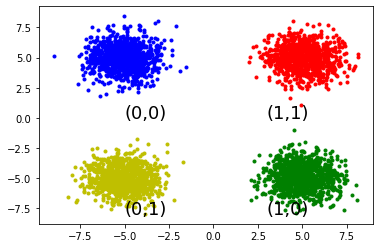

In [ ]:
# Generating the X non seperable dataset

# Number of training and testing samples

numberTrain=1000
numberTest=500

# defining the mean for 4 classes data

# mean_1=np.zeros(2)
# mean_2=np.array((10,10))
# mean_3=np.array((0,20))
# mean_4=np.array((-10,10))

mean_1=np.array([5,5])
mean_2=np.array([-5,-5])
mean_3=np.array([5,-5])
mean_4=np.array([-5,5])

# unit covarience matrix 

var_1=np.diag(np.ones(2))
var_2=var_1
var_3=var_1
var_4=var_1

# generating data using mean and covarience matrix for the 4 classes

data1=np.random.multivariate_normal(mean_1,var_1,int(numberTrain))
data2=np.random.multivariate_normal(mean_2,var_2,int(numberTrain))
data3=np.random.multivariate_normal(mean_3,var_3,int(numberTrain))
data4=np.random.multivariate_normal(mean_4,var_4,int(numberTrain))


# combining all data into one matrix

dataNonSeparable=np.concatenate((data1,data2,data3,data4),axis=0)

# Plotting the generated data

plt.figure()
plt.plot(data1[:,0],data1[:,1],'.',color='r')
plt.plot(data2[:,0],data2[:,1],'.',color='y')
plt.plot(data3[:,0],data3[:,1],'.',color='g')
plt.plot(data4[:,0],data4[:,1],'.',color='b')

# Showing the class labels 

# plt.text(-2,5,'(0,0)' , fontsize = 18, )
# plt.text(8,4,'(0,1)' ,  fontsize = 18,)
# plt.text(-2,15,'(1,0)' ,  fontsize = 18,)
# plt.text(-12,4,'(1,1)' ,  fontsize = 18,)


plt.text(-5,0,'(0,0)' , fontsize = 18, )
plt.text(-5,-8,'(0,1)' ,  fontsize = 18,)
plt.text(3,-8,'(1,0)' ,  fontsize = 18,)
plt.text(3,0,'(1,1)' ,  fontsize = 18,)


#Random initialization of weights
w=np.random.uniform(0,1,(dataNonSeparable.shape[1],2))
print(w.shape)

In [ ]:
dataNonSeparable.shape

(4000, 2)

In [ ]:
# Defining the target output labels
XNonSeparable =0

# Output label for red class

y_1=np.zeros((data1.shape[0],2))

# Output label for yellow class

y_2=np.zeros((data2.shape[0],2))
y_2[:,1] = 1

# Output label for green class

y_3=np.zeros((data3.shape[0],2))
y_3[:,0] = 1

# Output label for blue class

y_4=np.ones((data4.shape[0],2))



# combining all labels into one matrix

yNonSeparable=np.concatenate((y_1,y_2,y_3,y_4),axis=0)
print(yNonSeparable.shape)

# data augmentation, adding the bias term to input matrix


XNonSeparable=np.concatenate((np.ones((dataNonSeparable.shape[0],1)),dataNonSeparable),axis=1)
XNonSeparable.shape

(4000, 2)


(4000, 3)

# **Test Dataset**

In [ ]:
# Generating the X test dataset
XtestNonSep =0
testData1=np.random.multivariate_normal(mean_1,var_1,int(numberTest))
testData2=np.random.multivariate_normal(mean_2,var_2,int(numberTest))
testData3=np.random.multivariate_normal(mean_3,var_3,int(numberTest))
testData4=np.random.multivariate_normal(mean_4,var_4,int(numberTest))


# combining all data into one matrix

testData=np.concatenate((testData1,testData2,testData3,testData4),axis=0)

# data augmentation, adding the bias term to input matrix

XtestNonSep=np.concatenate((np.ones((testData.shape[0],1)),testData),axis=1)
print(XtestNonSep.shape)

(2000, 3)


In [ ]:
#Defining the target output labels

# Output label for red class

testY1=np.zeros((testData1.shape[0],2))

# Output label for yellow class

testY2=np.zeros((testData2.shape[0],2))
testY2[:,1] = 1

# Output label for blue class


testY3=np.zeros((testData4.shape[0],2))
testY3[:,0] = 1

# Output label for green class


testY4=np.ones((testData3.shape[0],2))

# combining all labels into one matrix

yTestNonSep =np.concatenate((testY1,testY2,testY3,testY4),axis=0)
print(yTestNonSep.shape)

(2000, 2)


# **Neural Network**

In [ ]:
def sigmoid(x): 
    return(1/(1 + np.exp(-x))) 
def relu(X):
    return np.where(X <= 0, 0, X) 
def meanSquaredError(yPred,yActual):
    return np.sum((np.square(yPred-yActual)))/len(yActual)
# gives the fraction of correct predictions
def accuracy(pred,actual):
    return (actual.shape[0]-np.count_nonzero(actual-pred))/actual.shape[0]


In [ ]:
#layer wise prediction outputs
def predictOneLayer(X,Wj,Wk):
    x,s = feedForwardOneLayers(X, Wj, Wk)
    return np.where(s["sk"] <= 0.5, 0, 1)
def predictTwoLayer(X,Wj,Wk,Wl):
    x,s = feedForwardTwoLayers(X, Wj, Wk,Wl)
    return np.where(s["sl"] <= 0.5, 0, 1)
def generateWeights(x,y):
    return np.random.randn(x,y)
# Calculating the weighted sum and applying the output function

def predict(X, W):
    res = np.dot(X,W)
    out = np.where(res <= 0, 0, 1)
    return out

**Two layer perceptron design**

In [ ]:
# perceptron learning algorithm

def perceptron(X,y,epochs,learningRate):
    
    # learning rate
    
    lr=learningRate
    
    # random initialization of weights
    
    W=np.random.uniform(0,1,(X.shape[1],y.shape[1]))
    
    #W=np.zeros((X.shape[1],y.shape[1]))
    #W=np.random.rand(X.shape[1],y.shape[1])

    print(W)
    
    # storing the number of misclassifications after each iteration
    
    Misclassified=[]
    
    for iterations in range(epochs):
        
        # predicted output of perceptron
        
        pred = predict(X,W)
        
        # error between desired and actual output
        
        error = np.subtract(y,pred)
        
        # Weight update amount
        grad = (lr*(np.dot(X.T,error)))/(2*X.shape[0])
        
        # Updating the weights
        W = W + grad

        # no of miss classification
        miss = np.sum(np.abs(error))
        
        # defining the accuracy percentage
        accuracy = (1-miss/X.shape[0])*100
        
        
        Misclassified.append(miss)
        
        # for plotting the hyperplanes
        if (np.remainder(iterations,1000)==0):
            
            print('After iteration=',iterations)
            print('number of miss classifications =',miss)
            print(W)
            
            # Generating 1000 pts between the min and max of input data
            xAxis=np.linspace(np.min(X[:,[1,2]]),np.max(X[:,[1,2]]),1000).reshape(1000,1)
            
            # y co-ordinates for seperating hyperplane
            hyperplane1=((-W[0,0]-(W[1,0]*xAxis))/(W[2,0]))
            hyperplane2=((-W[0,1]-(W[1,1]*xAxis))/(W[2,1]))

            plt.figure(figsize=(8,8))
            plt.plot(data1[:,0],data1[:,1],'.',color='r')
            plt.plot(data2[:,0],data2[:,1],'.',color='y')
            plt.plot(data3[:,0],data3[:,1],'.',color='g')
            plt.plot(data4[:,0],data4[:,1],'.',color='b')
            
            plt.plot(xAxis,hyperplane1, color = "pink")
            plt.plot(xAxis,hyperplane2 , color = "black")
            
            
        # early stopping
            
        if miss ==0:
                        
            print('After iteration=',iterations)
            print('number of miss classifications =',miss)
            
            
            accuracy = (1-miss/X.shape[0])*100
            
            
            print("accuracy = ",accuracy,"%")
            
            
            xAxis=np.linspace(np.min(X[:,[1,2]]),np.max(X[:,[1,2]]),1000).reshape(1000,1)
            
            hyperplane1=((-W[0,0]-(np.dot(W[1,0],xAxis)))/(W[2,0]))
            hyperplane2=((-W[0,1]-(W[1,1]*xAxis))/(W[2,1]))

            plt.figure()
            plt.plot(data1[:,0],data1[:,1],'.',color='r')
            plt.plot(data2[:,0],data2[:,1],'.',color='y')
            plt.plot(data3[:,0],data3[:,1],'.',color='g')
            plt.plot(data4[:,0],data4[:,1],'.',color='b')
            plt.plot(xAxis,hyperplane1, color = "pink")
            plt.plot(xAxis,hyperplane2 , color = "black")
            break
            
            
    plt.figure()
    plt.plot(Misclassified)
    plt.title('error vs Iteration')
    
    return W,accuracy,iterations

In [ ]:
def perceptron_learning(data, w, trn_lbl, lr):
    error_miss_norm=[]          #for storing no. of misclassified points in each iteration
    for itr in range(10000):
        y_est=data @ w      #activation value
  

        # step function
        y_pred=np.ones(y_est.shape)

        for i in range(2000):
          #activation function outputs 0 if activation value <=0, otherwise outputs 1
            if y_est[i,0]<=0:
                y_pred[i,0]=0
            if y_est[i,1]<=0:
                y_pred[i,1]=0

        miss=0
        for i in range(2000):
            if y_pred[i,0]!=trn_lbl[i,0] or y_pred[i,1]!=trn_lbl[i,1]:
                miss += 1

        error_miss_norm.append(miss)

        # gradient based perceptron learning law
  
        grad_wlr=(lr*((trn_lbl-y_pred).T @ data).T)/(2*data.shape[0]) 
        w=w+grad_wlr
        
        
        if itr%1000==0:
            print('After iteration=',itr)
            print('miss classified=',miss)
            x_dc1=np.linspace(np.min(data[:,1]),np.max(data[:,1]),500)
            leq1=((-w[0,0]-(w[1,0]*x_dc1))/(w[2,0]))

            x_dc2=np.linspace(np.min(data[:,1]),np.max(data[:,1]),500)
            leq2=((-w[0,1]-(w[1,1]*x_dc2))/(w[2,1]))

            
            plt.figure()
            plt.plot(data1[:,0],data1[:,1],'.',color='blue')
            plt.plot(data2[:,0],data2[:,1],'.',color='green')
            plt.plot(data3[:,0],data3[:,1],'.',color='black')
            plt.plot(data4[:,0],data4[:,1],'.',color='yellow')
            plt.plot(x_dc1,leq1)
            plt.plot(x_dc2,leq2)
            plt.ylim((-10,10))
            plt.title('Iteration= %d' % (itr))

    plt.figure()
    plt.plot(error_miss_norm)
    plt.title('Error vs Iteration')

    return w

**Defining Forward Propagation**

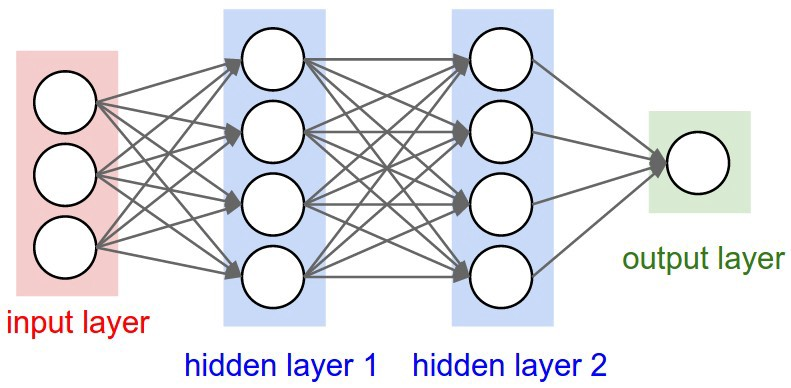

In [ ]:
def feedForwardTwoLayers(X,Wj,Wk,Wl):
    
    x = {}
    s = {}
    
    #Second layer outputs
    
    x["xj"] = X.dot(Wj)
    s["sj"] = sigmoid(x["xj"])
    
    #Third layer outputs
    
    x["xk"] = s["sj"].dot(Wk)
    s["sk"] = sigmoid(x["xk"])

    #Fourth layer outputs

    x["xl"] =  s["sk"].dot(Wl)
    s["sl"] = sigmoid(x["xl"])
    
    return x,s

In [ ]:
def feedForwardOneLayers(X,Wj,Wk):
    
    #Storing the outputs
    
    x = {}
    s = {}
    
    #Second layer outputs

    
    x["xj"] = X.dot(Wj)
    s["sj"] = sigmoid(x["xj"])
    
    #Third layer outputs

    
    x["xk"] = s["sj"].dot(Wk)
    s["sk"] = sigmoid(x["xk"])
    
    return x,s

**Defining Backpropagation**

**Derivative of activation function**

In [ ]:
# Calculate the derivative of an neuron relu activation function

def activationReluDerivative(output):
    return np.where(output <= 0, 0, 1)
# Calculate the derivative of an neuron sigmoid activation function
def activationDerivative(output):
    return output * (1.0 - output)


**Sigmoid activation neuron**

In [ ]:
def backPropogationOneHiddenLayers(X,y,Wj,Wk,x,s,learningRate =0.1,):
    
    #Storing weight changes and errors
    
    dW = {}
    dl = {}
    
    #Third layer weights change

    
    dl["dlk"] = (y-s["sk"])*activationDerivative(s["sk"])
    dW["dWk"] =  np.dot( s["sj"].T,dl["dlk"]).T/X.shape[0]
    
    
    #Second layer weights change

    
    dl["dlj"] = np.dot(dl["dlk"],Wk.T)*activationDerivative(s["sj"])
    dW["dWj"] = np.dot( X.T,dl["dlj"]).T/X.shape[0]
    return dW

In [ ]:
def backPropogationTwoHiddenLayers(X,y,Wj,Wk,Wl,x,s,learningRate =0.1,):
    
    #Storing weight changes and errors

    
    dW = {}
    dl = {}
    
    #Fourth layer weights change

    
    dl["dll"] = (y-s["sl"])*activationDerivative(s["sl"])
    dW["dWl"] =  np.dot( s["sk"].T,dl["dll"]).T/X.shape[0]
    
    #Third layer weights change

    
    dl["dlk"] = np.dot(dl["dll"],Wl.T)*activationDerivative(s["sk"])
    dW["dWk"] = np.dot( s["sj"].T,dl["dlk"]).T/X.shape[0]
    
    #Second layer weights change

    
    dl["dlj"] = np.dot(dl["dlk"],Wk.T)*activationDerivative(s["sj"])
    dW["dWj"] = np.dot( X.T,dl["dlj"]).T/X.shape[0]
    return dW

# **Training**

In [ ]:
def trainOneHidden(X, y, Wj,Wk, epochs=1000, learningRate= 0.01):
    
    errors = []
    Wj = generateWeights(Wj[0],Wj[1]) 
    Wk = generateWeights(Wk[0],Wk[1]) 

    
    for i in range(epochs):
        x,s = feedForwardOneLayers(X, Wj, Wk)
        
        dW = backPropogationOneHiddenLayers(X, y, Wj,Wk,x,s)
        
        Wj = Wj + learningRate*dW["dWj"].T
        Wk = Wk + learningRate*dW["dWk"].T

        
        errors.append(meanSquaredError(s["sk"],y))
    
    return errors,Wj,Wk

In [ ]:
def trainTwoHidden(X, y,Wj,Wk,Wl,epochs=10000, learningRate= 0.1,):
    errors = []

    Wj = generateWeights(Wj[0],Wj[1]) 
    Wk = generateWeights(Wk[0],Wk[1]) 
    Wl = generateWeights(Wl[0],Wl[1]) 
    
    grad = []

    
    for i in range(epochs):
        x,s = feedForwardTwoLayers(X, Wj, Wk ,Wl)

        dW = backPropogationTwoHiddenLayers(X, y, Wj,Wk,Wl,x,s)
        grad.append(dW)

        Wj = Wj + learningRate*dW["dWj"].T
        Wk = Wk + learningRate*dW["dWk"].T
        Wl = Wl + learningRate*dW["dWl"].T


        
        errors.append(meanSquaredError(s["sl"],y))
        
    
    
    return errors,Wj,Wk,Wl,grad

# **Training on non-linearly separable data**

In [ ]:
#Random initialization of weights
w=np.random.uniform(0,1,(XNonSeparable.shape[1],2))
print(w.shape)

(3, 2)


Demonstration of failure of 2 layer neural network 

After iteration= 0
miss classified= 2000
After iteration= 1000
miss classified= 182
After iteration= 2000
miss classified= 181
After iteration= 3000
miss classified= 181
After iteration= 4000
miss classified= 181
After iteration= 5000
miss classified= 181
After iteration= 6000
miss classified= 181
After iteration= 7000
miss classified= 181
After iteration= 8000
miss classified= 181
After iteration= 9000
miss classified= 182


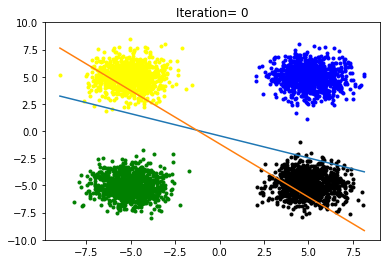

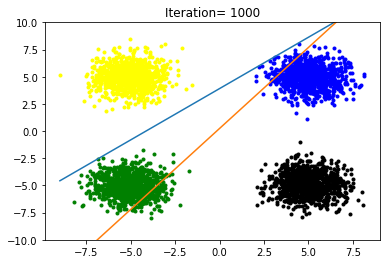

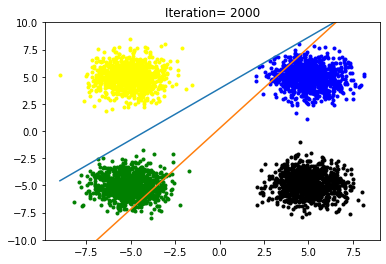

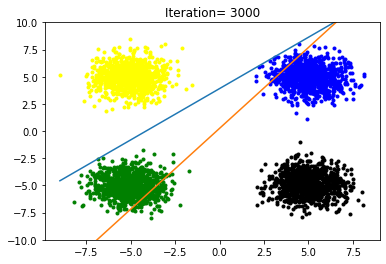

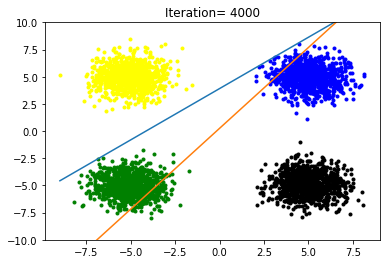

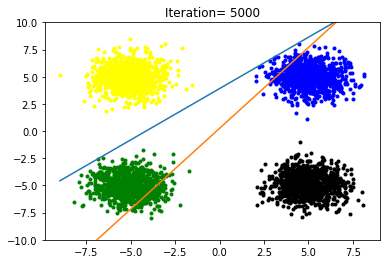

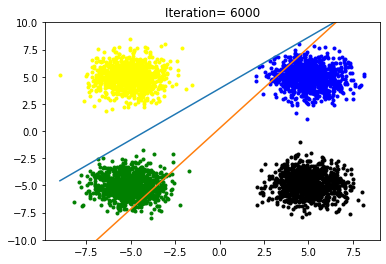

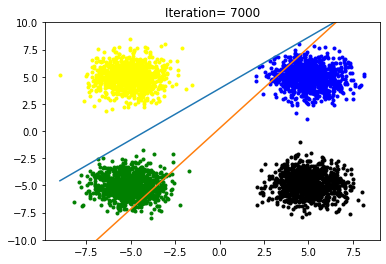

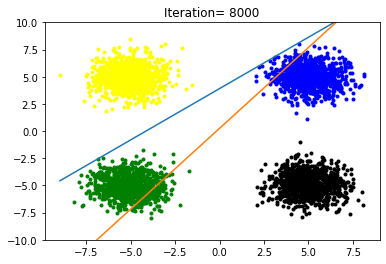

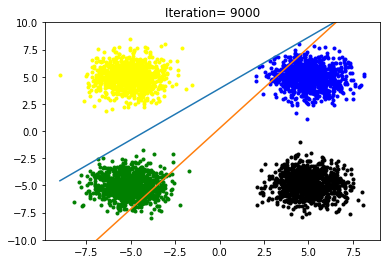

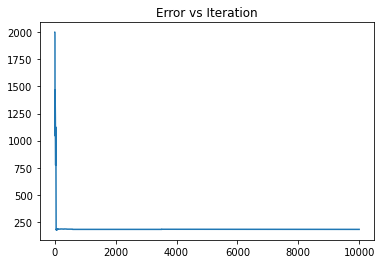

In [ ]:
# Training the perceptron model

# w_learned = perceptron_learning(dataNonSeparable,w,yNonSeparable,0.1)      #learned weights of perceptron
# print(w_learned)
learnedWeightsPerceptron,accuracy,iterations = perceptron_learning(XNonSeparable,w,yNonSeparable, 0.1)

3 layer network classifies non linearly separable data

Text(0, 0.5, 'error')

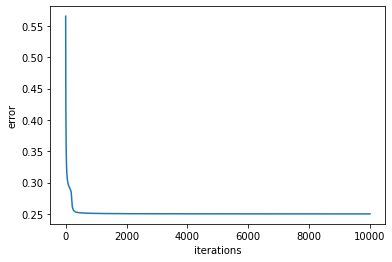

In [ ]:
# Training the one hidden layer perceptron model

errors1,Wj1,Wk1= trainOneHidden(XNonSeparable[:,[1,2]],yNonSeparable,(2,4),(4,2),epochs=10000,learningRate=1)
plt.plot(errors1)
plt.xlabel("iterations")
plt.ylabel("error")

In [ ]:
predictionsOneLayer = predictOneLayer(XNonSeparable[:,[1,2]],Wj1,Wk1)
# Getting accuracy of 1 layer model on train



In [ ]:
accuracy(predictionsOneLayer,yNonSeparable)


0.508

In [ ]:
## Testing learned weights on test data
predictionsOneLayerTest = predictOneLayer(XtestNonSep[:,[1,2]],Wj1,Wk1)


In [ ]:
# Getting accuracy of 1 layer model on test
accuracy(predictionsOneLayerTest,yTestNonSep)

0.508

# **Training on Non Convex data**

**Generating Non Convex data**

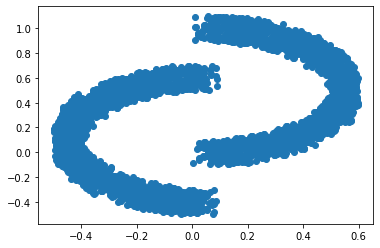

In [ ]:
m = 4000
theta = np.linspace(np.pi/2, 1.5*np.pi, m//2)
radius = 0.5
a = radius*np.cos(theta) + 0.1*np.random.rand(len(theta))
b = radius*np.sin(theta) + 0.2*np.random.rand(len(theta))
a = np.expand_dims(a, axis=-1).T
b = np.expand_dims(b, axis=-1).T

theta1 = np.linspace(-0.5*np.pi, 0.5*np.pi, m//2)
c = radius*np.cos(theta1) + 0.1*np.random.rand(len(theta1))
d = 0.4 + radius*np.sin(theta1) + 0.2*np.random.rand(len(theta1))
c = np.expand_dims(c, axis=-1).T
d = np.expand_dims(d, axis=-1).T

class_1 = np.concatenate([a, b], axis=0)
class_2 = np.concatenate([c, d], axis=0)
XNonConvex = np.c_[class_1, class_2].T
yNonConvex = np.c_[np.zeros((1, class_1.shape[1])), np.ones((1, class_2.shape[1]))].T

plt.figure()
plt.scatter(XNonConvex[:, 0], XNonConvex[:, 1])
plt.show()

Training with 1 hidden layer

Text(0, 0.5, 'error')

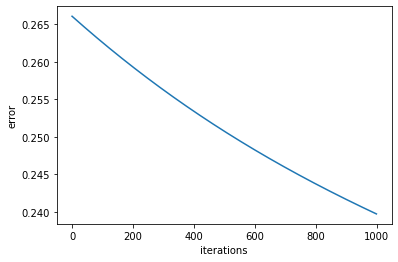

In [ ]:
# Training the one hidden layer perceptron model

errorsNc1,WjNc1,WkNc1= trainOneHidden(XNonConvex,yNonConvex,(2,4),(4,1),epochs=1000,learningRate=0.01)
plt.plot(errorsNc1)
plt.xlabel("iterations")
plt.ylabel("error")

Training with 2 hidden layer

Text(0, 0.5, 'error')

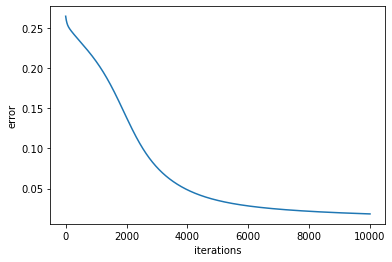

In [ ]:
# Training the two hidden layer perceptron model

errorsNc2,WjNc2,WkNc2,WlNc2,gradSigmoid= trainTwoHidden(XNonConvex,yNonConvex,(2,6),(6,4),(4,1),epochs=10000,learningRate=0.1)
plt.plot(errorsNc2)
plt.xlabel("iterations")
plt.ylabel("error")

In [ ]:
predictionsTwoLayerNc = predictTwoLayer(XNonConvex,WjNc2,WkNc2,WlNc2)
# Getting accuracy of 2 layer model on non convex

accuracy(predictionsTwoLayerNc,yNonConvex)

0.984

# **Vanishing gradient problem**

Using previous result of training on non-convex data with 4 neural network

In [ ]:
## Here we take the gradients in weights in the first iteration
# Gradient of weights in the outermost layer
np.absolute(gradSigmoid[0]['dWl']).mean()

0.014681095453583568

In [ ]:
## Gradient of weights in the middle layer

np.absolute(gradSigmoid[0]['dWk']).mean()

0.002091705756238928

In [ ]:
# Gradient of weights in the innermost layer

np.absolute(gradSigmoid[0]['dWj']).mean()

0.0023914579475154242

Using RELU instead of SIGMOID

In [ ]:
# Same function as above just replaced with relu
def feedForwardTwoLayersRelu(X,Wj,Wk,Wl):
    
    x = {}
    s = {}
    
    x["xj"] = X.dot(Wj)
    s["sj"] = relu(x["xj"])
    

    
    x["xk"] = s["sj"].dot(Wk)
    s["sk"] = relu(x["xk"])

    
    
    x["xl"] =  s["sk"].dot(Wl)
    s["sl"] = relu(x["xl"])
    
    return x,s

In [ ]:
def backPropogationTwoHiddenLayersRelu(X,y,Wj,Wk,Wl,x,s,learningRate =0.1,):
    
    dW = {}
    dl = {}
    
    dl["dll"] = (y-s["sl"])*activationReluDerivative(s["sl"])
    dW["dWl"] =  np.dot( s["sk"].T,dl["dll"]).T/X.shape[0]
    
    
    dl["dlk"] = np.dot(dl["dll"],Wl.T)*activationReluDerivative(s["sk"])
    dW["dWk"] = np.dot( s["sj"].T,dl["dlk"]).T/X.shape[0]
    
    dl["dlj"] = np.dot(dl["dlk"],Wk.T)*activationReluDerivative(s["sj"])
    dW["dWj"] = np.dot( X.T,dl["dlj"]).T/X.shape[0]
    
    return dW

In [ ]:
#training with RelU
def trainTwoHiddenRelu(X, y,epochs=10000, learningRate= 0.1,):
    errors = []
    Wj = generateWeights(2,6) 
    Wk = generateWeights(6,4) 
    Wl = generateWeights(4,1) 
    grad = []

    
    for i in range(epochs):
        x,s = feedForwardTwoLayersRelu(X, Wj, Wk ,Wl)
        
        dW = backPropogationTwoHiddenLayersRelu(X, y, Wj,Wk,Wl,x,s)
        grad.append(dW)
        Wj = Wj + learningRate*dW["dWj"].T
        Wk = Wk + learningRate*dW["dWk"].T
        Wl = Wl + learningRate*dW["dWl"].T


        
        errors.append(meanSquaredError(s["sl"],y))
        
    
    
    return errors,Wj,Wk,Wl,grad

Text(0, 0.5, 'error')

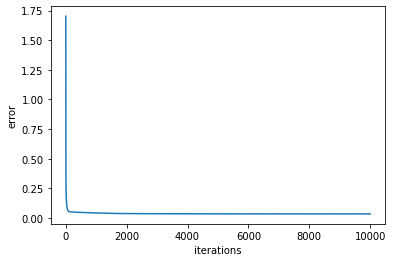

In [ ]:
errorsRelu,WjRelu,WkRelu,WlRelu,gradRelu = trainTwoHiddenRelu(XNonConvex,yNonConvex,learningRate=0.1,epochs = 10000, )
plt.plot(errorsRelu)
plt.xlabel("iterations")
plt.ylabel("error")

In [ ]:
predictionsRelu = predictTwoLayer(XNonConvex,WjRelu,WkRelu,WlRelu)
accuracy(predictionsRelu,yNonConvex)
np.absolute(gradRelu[0]['dWl']).mean()

0.5453229565226791

In [ ]:
np.absolute(gradRelu[0]['dWk']).mean()

0.14621729946112452

In [ ]:
np.absolute(gradRelu[0]['dWj']).mean()

0.24984406212480428

## Inferences and Conclusion : State all the key observations and conclusion

RElu function works more efficiently than sigmoid and the vanishing gradient problem can be handled by using Relu activation function instead of sigmoid. 